In [4]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [5]:
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [6]:
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

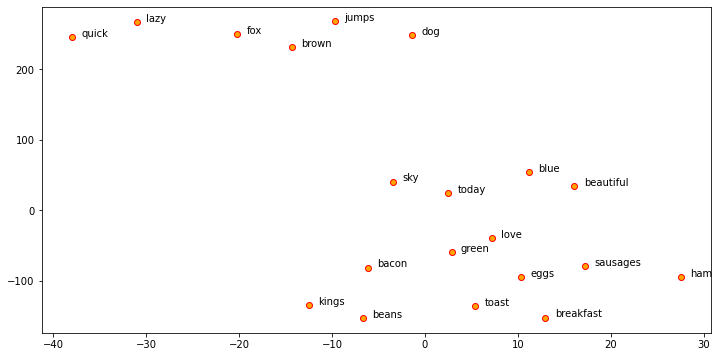

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [8]:
w2v_model.wv['sky'], w2v_model.wv['sky'].shape

(array([ 0.5901231 , -0.27006036, -0.6162933 ,  0.03348224, -0.58175987,
        -0.2239995 ,  0.6432727 , -1.2443583 ,  0.87894946, -0.48359844,
         0.3910847 ,  1.2887591 ,  1.1640781 ,  0.03918188, -0.24418046],
       dtype=float32),
 (15,))

In [9]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,0.590123,-0.270060,-0.616293,0.033482,-0.581760,-0.224000,0.643273,-1.244358,0.878949,-0.483598,0.391085,1.288759,1.164078,0.039182,-0.244180
blue,0.761563,-0.527873,-0.530229,0.116473,-0.224081,0.206956,0.491318,-0.656948,0.603643,-0.321224,0.191380,0.754082,0.782488,0.015876,-0.227456
beautiful,0.501046,-0.077995,-0.625937,0.324178,-0.678049,-0.366261,0.707924,-1.032845,0.769896,-0.433159,0.455577,0.935770,1.155058,0.056266,-0.396585
quick,1.321158,-0.327159,-0.833051,0.123090,-0.010037,0.673892,0.011780,0.185705,0.683761,-0.058162,-1.000780,0.619185,0.596825,0.577763,-1.036680
brown,1.220533,-0.595399,-0.742319,0.518926,0.074819,0.537514,-0.131311,0.112869,0.804206,-0.067549,-0.801805,0.583788,0.410083,1.024163,-0.995819
fox,1.344648,-0.438212,-0.790581,0.176637,0.030300,0.536940,0.023213,0.196753,0.660962,0.019527,-0.953956,0.514502,0.744405,0.886919,-1.003425
lazy,1.412866,-0.581408,-0.704060,0.145224,0.149428,0.491609,-0.261186,0.255360,0.605230,-0.194266,-0.818740,0.732179,0.502014,0.731239,-1.017475
dog,1.285484,-0.540342,-0.834003,0.273921,0.143706,0.590362,0.052106,0.142036,0.593425,0.001922,-0.887361,0.507447,0.605810,0.922406,-0.870109
love,0.054078,0.445047,-0.172777,0.463980,-0.453906,-0.507149,0.141496,-0.850420,0.049090,0.005038,-0.128646,0.689193,0.661565,-0.013983,0.244307
sausages,0.421486,0.809638,-0.065964,1.015051,-0.544445,-0.564850,-0.419330,-0.711730,-0.467688,-0.445006,-0.838754,0.641654,0.663067,0.060288,0.474045


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,kings,breakfast,toast,beans,green,today
sky,1.000000,0.931089,0.975838,0.430581,0.408975,0.425073,0.406693,0.411895,0.712442,0.337536,0.348052,0.344428,0.313627,0.319336,0.140615,0.147009,0.124365,0.183334,0.466796,0.979037
blue,0.931089,1.000000,0.894953,0.623460,0.602443,0.616093,0.607856,0.619979,0.502304,0.205309,0.232567,0.205546,0.198581,0.540043,0.066466,0.052134,0.052365,0.079260,0.358349,0.893418
beautiful,0.975838,0.894953,1.000000,0.407056,0.395476,0.410710,0.370357,0.391631,0.739355,0.373133,0.350935,0.384117,0.311872,0.293763,0.165245,0.184553,0.146275,0.224349,0.503504,0.982026
quick,0.430581,0.623460,0.407056,1.000000,0.956390,0.987246,0.975157,0.978253,0.084686,0.140652,0.116658,0.135944,0.148448,0.973784,0.245290,0.236151,0.244171,0.213723,0.089794,0.412272
brown,0.408975,0.602443,0.395476,0.956390,1.000000,0.972507,0.970770,0.981973,0.072284,0.132305,0.098510,0.152217,0.145299,0.978879,0.240127,0.244628,0.257863,0.213878,0.071054,0.387755
fox,0.425073,0.616093,0.410710,0.987246,0.972507,1.000000,0.975826,0.993712,0.091230,0.140507,0.103704,0.119584,0.141413,0.981354,0.240006,0.229002,0.238397,0.208148,0.065116,0.413556
lazy,0.406693,0.607856,0.370357,0.975157,0.970770,0.975826,1.000000,0.974657,0.035070,0.123913,0.135386,0.125325,0.144839,0.981481,0.234526,0.225808,0.240051,0.203622,0.056900,0.366672
dog,0.411895,0.619979,0.391631,0.978253,0.981973,0.993712,0.974657,1.000000,0.070190,0.125346,0.089458,0.111555,0.135203,0.989147,0.234888,0.217668,0.236504,0.197407,0.064182,0.395017
love,0.712442,0.502304,0.739355,0.084686,0.072284,0.091230,0.035070,0.070190,1.000000,0.802722,0.758632,0.791542,0.776716,0.015168,0.614642,0.638200,0.600410,0.670122,0.810404,0.745151
sausages,0.337536,0.205309,0.373133,0.140652,0.132305,0.140507,0.123913,0.125346,0.802722,1.000000,0.953565,0.924601,0.965776,0.148450,0.910895,0.928399,0.916942,0.939880,0.895369,0.341603


In [11]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky           [today, beautiful, blue]
blue           [sky, beautiful, today]
beautiful           [today, sky, blue]
quick                 [fox, dog, lazy]
brown                [dog, jumps, fox]
fox                [dog, quick, jumps]
lazy               [jumps, fox, quick]
dog                [fox, jumps, brown]
love          [green, sausages, bacon]
sausages            [eggs, ham, beans]
ham            [eggs, sausages, bacon]
bacon          [eggs, beans, sausages]
eggs            [ham, sausages, kings]
jumps                 [dog, lazy, fox]
kings        [toast, beans, breakfast]
breakfast        [toast, beans, kings]
toast        [kings, breakfast, beans]
beans        [kings, toast, breakfast]
green          [bacon, sausages, eggs]
today           [beautiful, sky, blue]
dtype: object

In [12]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model

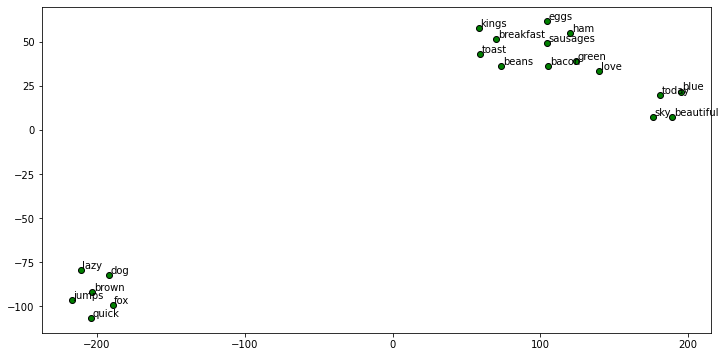

In [13]:
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')